<a href="https://colab.research.google.com/github/elolive/elolive/blob/master/midb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 1us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
#data to vector
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results




In [44]:
x_train = vectorize_sequence(train_data)
print(x_train.shape[1])
print(x_train[1])
print(train_data[1])
x_test = vectorize_sequence(test_data)


10000
[0. 1. 1. ... 0. 0. 0.]
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


In [45]:
print(len(x_train))
print(x_train[0])
print(train_labels[0])

8982
[0. 1. 1. ... 0. 0. 0.]
3


In [0]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels) 
#https://keras.io/ko/utils/

In [0]:
from keras import models

from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [55]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [67]:
history = model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.0931 - acc: 0.9584 - val_loss: 1.1263 - val_acc: 0.8020
Epoch 2/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.0927 - acc: 0.9598 - val_loss: 1.1868 - val_acc: 0.7960
Epoch 3/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.0915 - acc: 0.9597 - val_loss: 1.1735 - val_acc: 0.8000
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.0946 - acc: 0.9569 - val_loss: 1.1812 - val_acc: 0.7970
Epoch 5/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.0883 - acc: 0.9598 - val_loss: 1.3008 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.0921 - acc: 0.9572 - val_loss: 1.1815 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.0905 - acc: 0.9582 - val_loss: 1.1734 - val_acc: 0.8020
Epoch 8

range(1, 10)


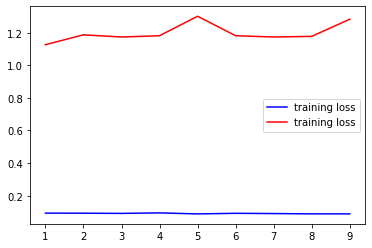

In [70]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

print(epochs)

plt.plot(epochs, loss, 'b', label = "training loss")
plt.plot(epochs, val_loss, 'r', label = "training loss")
plt.legend()
plt.show()


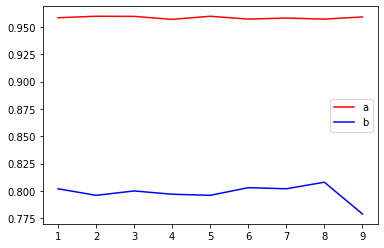

In [71]:
plt.clf()

acc=  history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label = 'a')
plt.plot(epochs, val_acc, 'b', label = 'b')
plt.legend()
plt.show()

In [72]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 150us/step
[1.4774347714622003, 0.7715939448438154]


In [0]:
prediction = model.predict(x_test)

In [74]:
prediction[0]

array([3.10638057e-08, 3.84156422e-08, 1.17049244e-11, 9.99200523e-01,
       7.68074882e-04, 1.47481454e-11, 1.40527685e-11, 1.87628801e-10,
       1.08824661e-05, 4.69671200e-08, 1.95977155e-08, 1.18012451e-06,
       4.12723988e-09, 3.63879913e-08, 8.90627627e-10, 2.13366583e-13,
       7.57688611e-07, 5.15646525e-10, 6.91161128e-10, 1.47360561e-05,
       2.29894658e-06, 6.29112321e-07, 4.18882892e-13, 2.65593103e-10,
       7.12484000e-13, 7.92273980e-09, 3.07643125e-13, 2.11661743e-13,
       2.94667557e-09, 1.02931011e-10, 1.10258121e-07, 7.74494875e-14,
       4.09524041e-08, 1.41022003e-11, 1.17617178e-08, 5.02235697e-10,
       6.36299887e-07, 2.65449013e-12, 3.43209072e-10, 1.14121169e-12,
       8.17861924e-12, 3.16175419e-10, 7.89475690e-13, 1.60037990e-11,
       6.33692678e-17, 7.06679593e-12], dtype=float32)

In [75]:
np.sum(prediction[0])

1.0000001

In [83]:
print(np.argmax(prediction[3]))

print(test_labels[3])

4
4
